In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

1. Reading Airbnb Data
====

Data from **five major cities** of emerging East Asian economies:

    1. Tokyo, Japan
    2. Beijing, China
    3. Shanghai, China
    4. Seoul, Korea
    5. Hong Kong

In [4]:
japan = read_csv('abnb_tokyo.csv')
china_b = read_csv('abnb_bejing.csv')
china_s = read_csv('abnb_shanghai.csv')
korea = read_csv('abnb_seoul.csv')
hong_kong = read_csv('abnb_hk.csv')

*Dataframe columns included in dataset:*

In [281]:
china_b.head(1)

,Unnamed: 0,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,44054,192875,Entire home/apt,Beijing,Shuangjing,25,4.5,NaN,3.0,2.0,197.0,1.0,39.893197,116.44997,2015-08-29 16:53:39.970742


*Colors for graphing:*

In [329]:
blue_color = '#5164C2'
red_color = '#F44547'
green_color = '#AAD399'
purple_color = '#DC65B2'
yellow_color = '#FDD559'

bl = '#5164C2'
rd = '#F44547'
gr = '#AAD399'
pu = '#DC65B2'
ye = '#FDD559'

----------------


2. Creating dataframes with interesting columns
=====

Only including relevant columns

In [39]:
beijing = china_b[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
seoul = korea[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
hong_kong = hong_kong[['room_id', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
tokyo = japan[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]
shanghai = china_s[['room_id', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay']]

--------

3. Running Descriptive Statistics
======

***Descriptive Statistics***

In [318]:
def get_statistics(location):
    location_stats = location[['room_id','overall_satisfaction', 'price', 'reviews', 'accommodates', 'bedrooms', 'bathrooms', 'minstay']].describe()
    #location_stats['city'] = location
    location_stats = concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats
 
statistics = concat([get_statistics(beijing),get_statistics(seoul),get_statistics(hong_kong),get_statistics(tokyo),get_statistics(shanghai)])
location = ['beijing', 'beijing', 'beijing', 'beijing', 'beijing', 'seoul', 'seoul', 'seoul', 'seoul', 'seoul', 'hong_kong', 'hong_kong', 'hong_kong', 'hong_kong', 'hong_kong', 'tokyo', 'tokyo', 'tokyo', 'tokyo', 'tokyo', 'shanghai', 'shanghai', 'shanghai', 'shanghai', 'shanghai']
statistics['location'] = location
statistics = statistics.set_index('location', append = True).unstack(0)
statistics

room_id                                                   \
            count         max          mean      min           std   
location                                                             
beijing    2158.0   8112096.0  5.706924e+06  44054.0  2.152427e+06   
hong_kong  4245.0   9883424.0  5.754796e+06   8402.0  2.778873e+06   
seoul      8519.0  13243603.0  7.514626e+06  35108.0  3.677643e+06   
shanghai   7348.0  12913772.0  8.856760e+06  54096.0  3.186771e+06   
tokyo      6371.0   8062042.0  5.458334e+06   7565.0  1.952667e+06   

          overall_satisfaction                                  ...     \
                         count  max      mean  min       std    ...      
location                                                        ...      
beijing                 1043.0  5.0  4.613615  1.0  0.595719    ...      
hong_kong               2943.0  5.0  4.418281  1.0  0.590716    ...      
seoul                   3940.0  5.0  4.682741  1.5  0.377364    ...      
shanghai                2079.0  5.0  4.708033  2.5  0.361645    ...      
tokyo                   5099.0  5.0  4.551971  1.0  0.504341    ...      

          bathrooms                               minstay                   \
              count  max      mean  min       std   count    max      mean   
location                                                                     
beijing      2130.0  8.0  1.154930  0.0  0.589510  2121.0   25.0  1.820839   
hong_kong    4080.0  8.0  1.194363  0.0  0.747451  4188.0   27.0  2.011223   
seoul        8008.0  8.0  1.183691  0.0  0.749405  8295.0   25.0  1.697649   
shanghai     7050.0  8.0  1.247801  0.0  0.778861  7291.0   90.0  1.529557   
tokyo        6343.0  8.0  1.113432  0.0  0.500809  5885.0  100.0  2.137808   

                          
           min       std  
location                  
beijing    1.0  2.442540  
hong_kong  1.0  2.097485  
seoul      1.0  1.741066  
shanghai   1.0  1.946274  
tokyo      1.0  2.800870  

[5 rows x 40 columns]

***<font color='red'>help: could not get location to work</font>***
----

4. Data Story Graphs Part I
======

*Comparing Listing Behavior in Emerging East Asian Countries*
-----

*** Number of Listings per City***

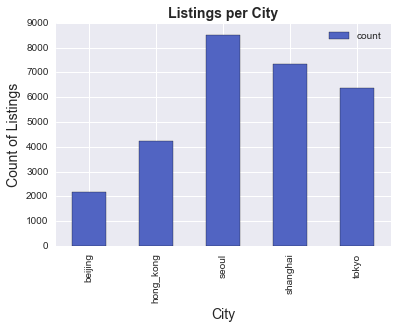

In [336]:
DataFrame(statistics['room_id']['count']).plot(kind = 'bar', color = bl)

plt.xlabel('City', fontsize=14)
plt.ylabel('Count of Listings', fontsize=14)
plt.title('Listings per City', fontsize=14, fontweight='bold')

***<font color='red'>Help: annotate points</font>***
----
***<font color='red'>plan to add more analysis based on post annotation analysis</font>***

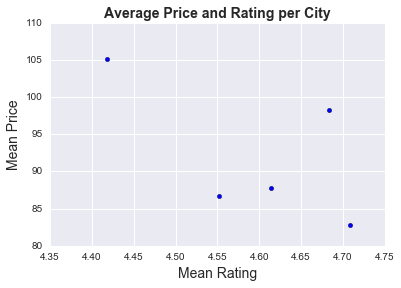

In [337]:
x = statistics['overall_satisfaction']['mean']
y = statistics['price']['mean']

plt.scatter(x, y)

plt.xlabel('Mean Rating', fontsize=14)
plt.ylabel('Mean Price', fontsize=14)
plt.title('Average Price and Rating per City', fontsize=14, fontweight='bold')

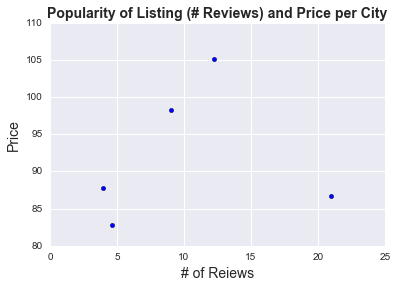

In [339]:
x = statistics['reviews']['mean']
y = statistics['price']['mean']

plt.scatter(x, y)
plt.xlabel('# of Reiews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Popularity of Listing (# Reviews) and Price per City', fontsize=14, fontweight='bold')

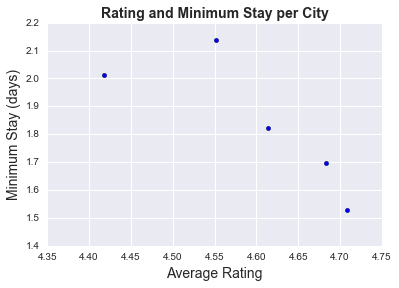

In [340]:
x = statistics['overall_satisfaction']['mean']
y = statistics['minstay']['mean']

plt.scatter(x, y)

plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Minimum Stay (days)', fontsize=14)
plt.title('Rating and Minimum Stay per City', fontsize=14, fontweight='bold')

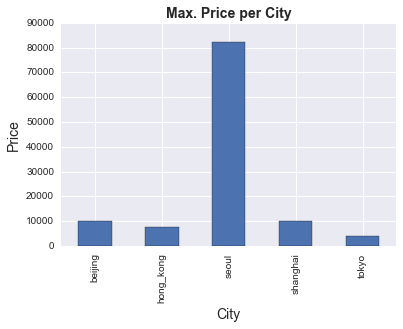

In [341]:
statistics['price']['max'].plot(kind ='bar')
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Max. Price per City', fontsize=14, fontweight='bold')

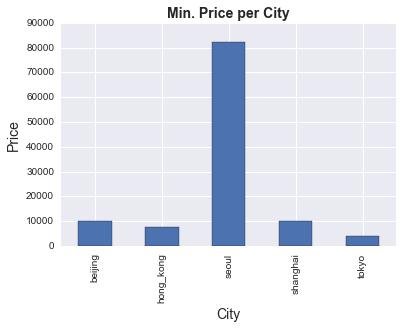

In [342]:
statistics['price']['max'].plot(kind ='bar')
plt.xlabel('City', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Min. Price per City', fontsize=14, fontweight='bold')

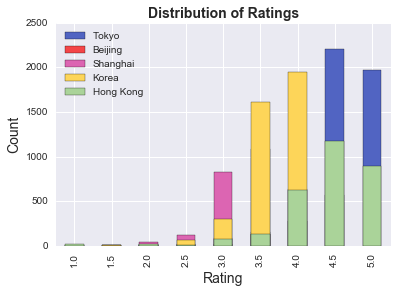

In [343]:
japan.groupby('overall_satisfaction').size().plot(kind = 'bar', color = blue_color , label = 'Tokyo' )
china_b.groupby('overall_satisfaction').size().plot(kind = 'bar', color = red_color, label = 'Beijing')
china_s.groupby('overall_satisfaction').size().plot(kind = 'bar', color = purple_color, label = 'Shanghai')
korea.groupby('overall_satisfaction').size().plot(kind = 'bar', color = yellow_color, label = 'Korea')
hong_kong.groupby('overall_satisfaction').size().plot(kind = 'bar', color = green_color, label = 'Hong Kong')


plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.legend(loc=0)

5. Data Story Graphs Part II
======

*Creating Indexes for Comparing Listing Behavior in Emerging East Asian Countries*
-----

***Popularity Index***

    Function of reviews and rating 
    
    Higher the #, more popular the listing

***Value Index***

        Function of Popularity Index, Size of Listing (#rooms, bathrooms,# accomodates) over Price
        
        Higher # means you get more Value per dollar spent on Listing
        

***<font color='red'>Feedback Here!</font>***
----

In [49]:
beijing['popularity_index'] = beijing['reviews'] * beijing['overall_satisfaction'] / 10
beijing['value_index'] = (beijing['popularity_index'] * (beijing['bedrooms'] + (.5 * beijing['bathrooms'])) * beijing['accommodates']) / beijing['price']

seoul['popularity_index'] = seoul['reviews'] * seoul['overall_satisfaction'] / 10
seoul['value_index'] = (seoul['popularity_index'] * (seoul['bedrooms'] + (.5 * seoul['bathrooms'])) * seoul['accommodates']) / seoul['price']

hong_kong['popularity_index'] = hong_kong['reviews'] * hong_kong['overall_satisfaction'] / 10
hong_kong['value_index'] = (hong_kong['popularity_index'] * (hong_kong['bedrooms'] + (.5 * hong_kong['bathrooms'])) * hong_kong['accommodates']) / hong_kong['price']

tokyo['popularity_index'] = tokyo['reviews'] * tokyo['overall_satisfaction'] / 10
tokyo['value_index'] = (tokyo['popularity_index'] * (tokyo['bedrooms'] + (.5 * tokyo['bathrooms'])) * tokyo['accommodates']) / tokyo['price']

shanghai['popularity_index'] = shanghai['reviews'] * shanghai['overall_satisfaction'] / 10
shanghai['value_index'] = (shanghai['popularity_index'] * (shanghai['bedrooms'] + (.5 * shanghai['bathrooms'])) * shanghai['accommodates']) / shanghai['price']

/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nicolesamrao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

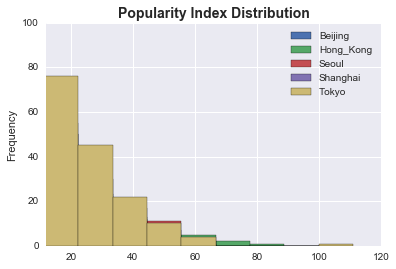

In [346]:
fig = plt.figure(figsize = (10,10), dpi = 100)

dict_popularity_index = {
    'Beijing': beijing['popularity_index'].dropna(),
    'Seoul' : seoul['popularity_index'].dropna(),
    'Hong_Kong' : hong_kong['popularity_index'].dropna(),
    'Tokyo' : tokyo['popularity_index'].dropna(),
    'Shanghai' : shanghai['popularity_index'].dropna()
                 }
df = DataFrame(dict_popularity_index).dropna()

df.plot.hist(bins = 10, xlim = 12, ylim = (0,100))


plt.title('Popularity Index Distribution', fontsize=14, fontweight='bold')
plt.legend(loc=0)


Tokyo has vastly more listings, so it overpowers the graph here

Graph of Popularity Index Distribution without Tokyo:

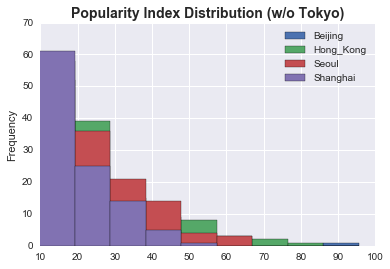

In [347]:
fig = plt.figure(figsize = (10,10), dpi = 100)

dict_popularity_index = {
    'Beijing': beijing['popularity_index'].dropna(),
    'Seoul' : seoul['popularity_index'].dropna(),
    'Hong_Kong' : hong_kong['popularity_index'].dropna(),
    #'Tokyo' : tokyo['popularity_index'].dropna(),
    'Shanghai' : shanghai['popularity_index'].dropna()
                 }
df = DataFrame(dict_popularity_index).dropna()

df.plot.hist(bins = 10, xlim = 10, ylim = (0,70))

plt.title('Popularity Index Distribution (w/o Tokyo)', fontsize=14, fontweight='bold')
plt.legend(loc=0)